In [183]:
import seaborn as sns
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import os

In [184]:
Frame = pd.DataFrame({
    "gradations":["grad1", "grad2", "grad3", "grad4", "grad5","grad6"],
    "gr1":[143,220,85,101,134,59],
    "gr2":[161,242,94,98,153,86]
})

0    grad1
1    grad2
2    grad3
3    grad4
4    grad5
5    grad6
Name: gradations, dtype: object


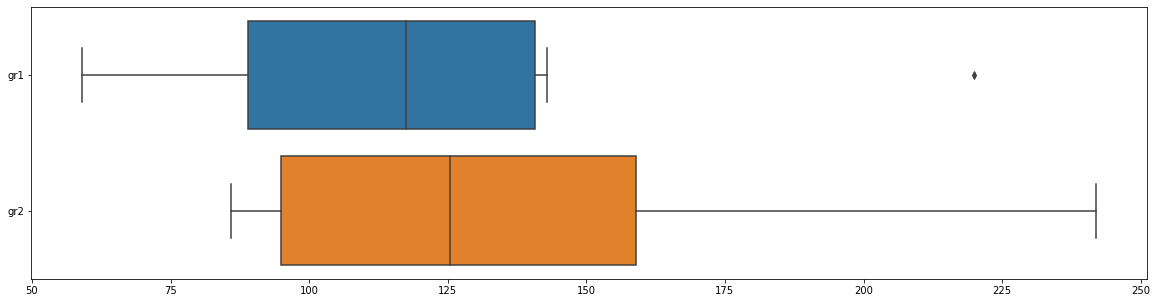

In [185]:
plt.subplots(figsize=(20,5))
sns.boxplot(orient = "h",data = Frame)


In [186]:
def pirs(Frame):
    k=Frame.shape[0]
    i = 0
    Rcriteria = 0
    df = k-2
    up = (k*pd.Series(Frame[Frame.keys()[1]]*Frame[Frame.keys()[2]]).sum())-(pd.Series(Frame[Frame.keys()[1]]).sum()*pd.Series(Frame[Frame.keys()[2]])).sum()
    down = sqrt(((k*pd.Series(Frame[Frame.keys()[1]]**2).sum())-(pd.Series(Frame[Frame.keys()[1]]).sum()**2))*
                         ((k*pd.Series(Frame[Frame.keys()[2]]**2).sum())-(pd.Series(Frame[Frame.keys()[2]]).sum()**2)))
    r = up/down
    tablecorrelation = pd.read_excel("cor.xlsx")
    while ((i < len(tablecorrelation)-1) and (df > tablecorrelation.iloc[i,0])):
        Rcriteria = tablecorrelation.iloc[i,1]
        i += 1
    if (df < tablecorrelation.iloc[i-1,0]):
        if (abs(df-tablecorrelation.iloc[i-1,0]) > abs(df-tablecorrelatiob.iloc[i,0])):
            Rcriteria = tablecorrelation.iloc[i,1]
    if abs(r) > Rcriteria:
        return r, df, "significant"
    else:
        "insignificant"

In [187]:
def student(Frame):
    tableVal=0
    i=0
    k=Frame.shape[0]
    df=k-1
    up = (Frame[Frame.keys()[1]]-Frame[Frame.keys()[2]]).mean()
    down=(Frame[Frame.keys()[1]]-Frame[Frame.keys()[2]]).std()
    t=(up/down)*sqrt(k)
    studentCrit=pd.read_excel("crit.xlsx")
    while ((i < len(studentCrit)-1) and (df > studentCrit.iloc[i,0])):
        t_table = studentCrit.iloc[i,1]
        i += 1
    if (abs(df-studentCrit.iloc[i-1,0]) > abs(df-studentCrit.iloc[i,0])):
        t_table = studentCrit.iloc[i,1]
    if abs(t) > t_table:
        return t, df, "significant"
    else:
        return "insignificant"

In [188]:

pirs(Frame)

(0.9843803120461528, 4, 'significant')

In [189]:
student(Frame)

(-3.495295419457998, 5, 'significant')

Висновок: присутній статистичний зв'язок, але ці величини є випадковими, тому такий зв'язок є повністю випадковим